In [24]:
import pandas as pd
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder

# Read the data from the Excel file
data = pd.read_excel('40000.xlsx')

# Initialize LabelEncoders
label_encoders = {}
categorical_columns = ['CompanyName', 'Customers', 'Continent', 'Country']

# Label encode categorical columns
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Mapping for label
label_map = {'yes': 1, 'no': 0}

# Process nodes and features
node_features = []
node_labels = []
for _, row in data.iterrows():
    label = row['Top500']
    label = label_map[label]
    node_labels.append(label)
    features = row[categorical_columns].values.tolist()
    node_features.append(features)

# Convert data to PyTorch tensors
x = torch.tensor(node_features, dtype=torch.long)
y = torch.tensor(node_labels, dtype=torch.float).view(-1, 1)

graphs = []
num_rows_per_graph = 100

for i in range(0, len(data), num_rows_per_graph):
    subset_data = data.iloc[i:i+num_rows_per_graph]

    # Process edges
    edges = []
    for _, row in subset_data.iterrows():
        company_name = row['CompanyName']
        customers = row['Customers']
        edges.append([company_name, customers])

    # Convert edges to PyTorch tensor
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

    # Create PyTorch Geometric Data object
    graph_data = Data(x=x[i:i+num_rows_per_graph], edge_index=edge_index, y=y[i:i+num_rows_per_graph])
    graphs.append(graph_data)

# Now graphs list contains 400 graph data objects, each with 100 rows.
print(graphs)

[Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2

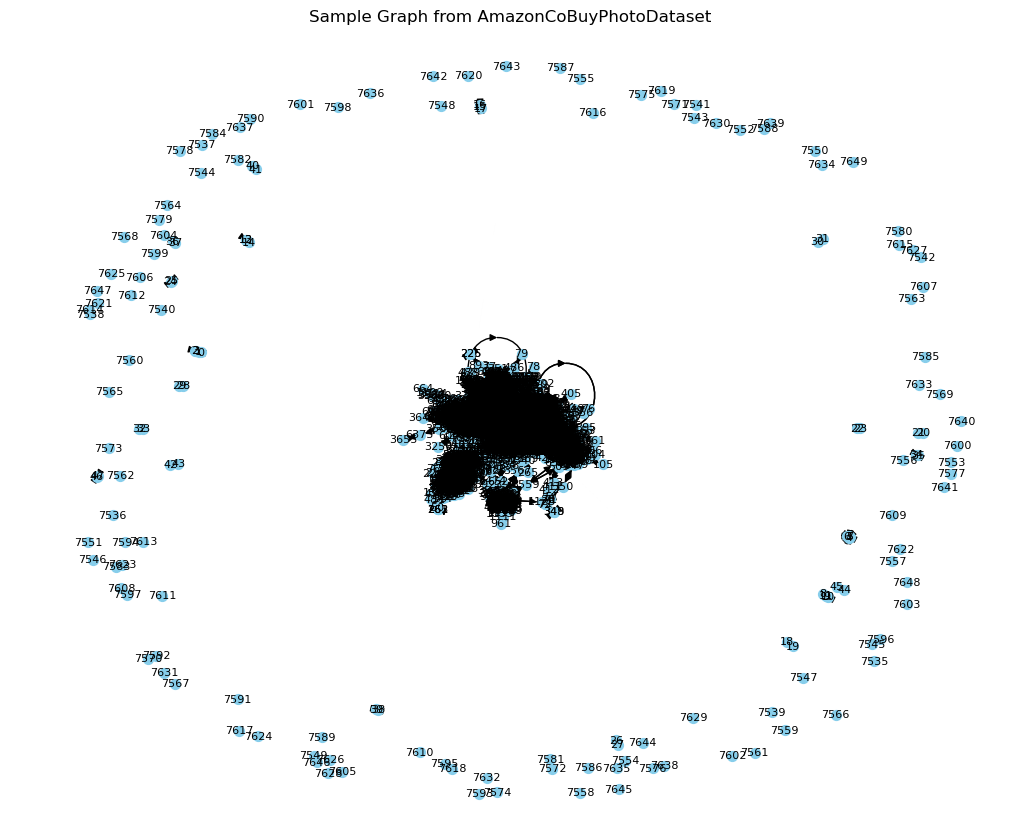

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from dgl.data import AmazonCoBuyPhotoDataset

# Load the dataset
dataset = AmazonCoBuyPhotoDataset()

# Get a sample graph
graph = dataset[0]

# Convert to NetworkX graph
nx_graph = graph.to_networkx()

# Visualize the graph
plt.figure(figsize=(10, 8))
nx.draw(nx_graph, with_labels=True, node_size=50, node_color='skyblue', font_size=8)
plt.title('Sample Graph from AmazonCoBuyPhotoDataset')
plt.show()


  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


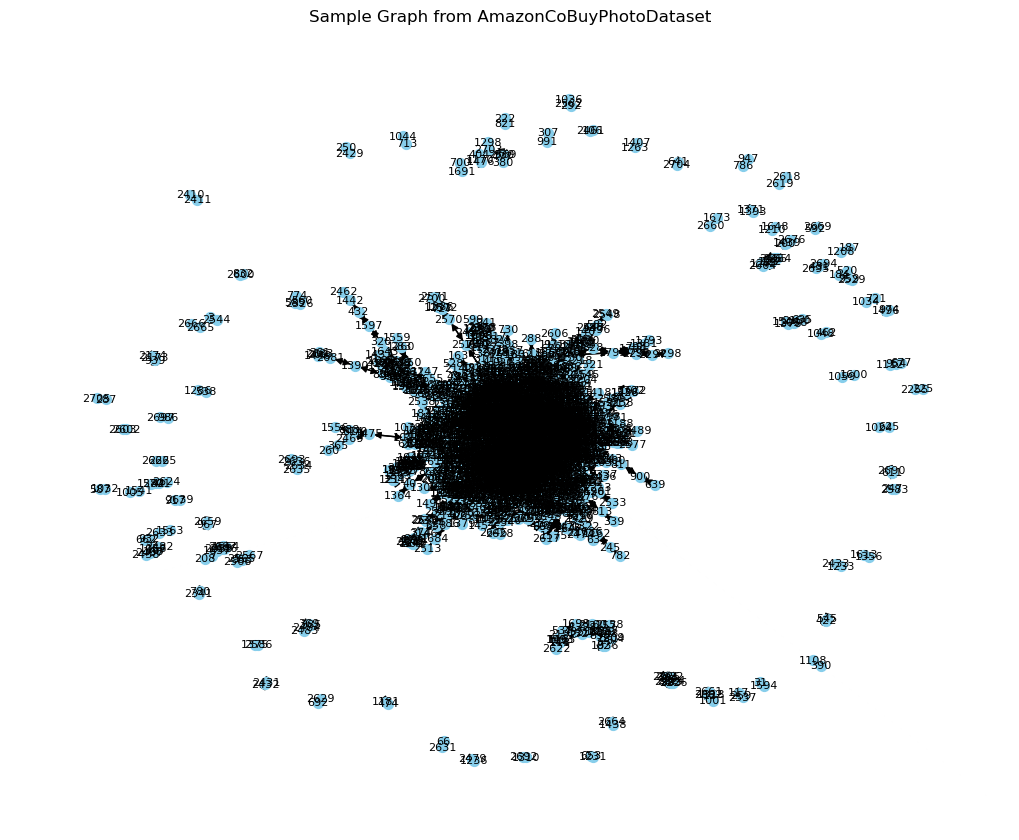

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from dgl.data import CoraGraphDataset

# Load the dataset
dataset = CoraGraphDataset()

# Get a sample graph
graph = dataset[0]

# Convert to NetworkX graph
nx_graph = graph.to_networkx()

# Visualize the graph
plt.figure(figsize=(10, 8))
nx.draw(nx_graph, with_labels=True, node_size=50, node_color='skyblue', font_size=8)
plt.title('Sample Graph from AmazonCoBuyPhotoDataset')
plt.show()


In [1]:
import torch
from torch_geometric.datasets import Planetoid

# Define the name of the dataset you want to load ('Cora', 'CiteSeer', or 'PubMed')
dataset_name = 'Cora'

# Load the dataset
dataset = Planetoid(root='data/' + dataset_name, name=dataset_name)

# Print dataset information
print(f'Dataset: {dataset_name}')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Access the first graph in the dataset
data = dataset[0]

# Print information about the first graph
print('\nInformation about the first graph:')
print(data)

# You can access the attributes of the data object such as x (node features), edge_index (edge connectivity), and y (node labels)
print('\nNode features shape:', data.x.shape)
print('Edge connectivity shape:', data.edge_index.shape)
print('Node labels shape:', data.y.shape)


Dataset: Cora
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Information about the first graph:
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

Node features shape: torch.Size([2708, 1433])
Edge connectivity shape: torch.Size([2, 10556])
Node labels shape: torch.Size([2708])


Processing...
Done!


In [5]:
import torch

# Load the .pt file
file_path = 'planar_64_200.pt'
loaded_obj = torch.load(file_path)

# Check the type of the loaded object
print(type(loaded_obj))

# If it's a model, you can inspect its architecture and parameters
if isinstance(loaded_obj, torch.nn.Module):
    print(loaded_obj)  # This will print the model architecture
    # You can also access its parameters
    for name, param in loaded_obj.named_parameters():
        print(f'Parameter: {name}, Size: {param.size()}')

# If it's a tensor or other object, you can inspect its shape and contents
elif isinstance(loaded_obj, torch.Tensor):
    print(loaded_obj.size())  # Print the shape of the tensor
    print(loaded_obj)  # Print the contents of the tensor

# Add more checks as needed for other types of objects


<class 'list'>


In [6]:
import torch

# Load the .pt file
file_path = 'planar_64_200.pt'
loaded_list = torch.load(file_path)

# Check the type of the loaded object (it should be a list)
print(type(loaded_list))

# Iterate through the elements in the list and inspect their types
for obj in loaded_list:
    print(type(obj))


<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'bool'>
<class 'int'>


In [17]:
import torch

# Load the .pt file
data = torch.load("planar_64_200.pt")

# Iterate over the elements of the list and print their types
for item in data:
    print(type(item))
    print(item)




<class 'list'>
[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]]), tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 1., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]]), tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
      

In [19]:
import torch

# Load the .pt file
data = torch.load("community_12_21_100.pt")

# Iterate over the elements of the list and print their types
for item in data:
    print(type(item))
    print(item)




<class 'list'>
[tensor([[0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.]]), tensor([[0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0